In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel,ttest_ind

In [4]:
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr
# import R's "base" package
lme4 = importr('lme4')
optimx = importr('optimx')
pbkrtest = importr('pbkrtest')
lmerTest = importr('lmerTest')
ggplot = importr('ggplot2')
dplyr = importr('dplyr')
sjplot = importr('sjPlot')
car = importr('car')

In [5]:
home_dir = '/Users/dbao/google_drive_db'+'/road_construction/data/2022_online/'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

In [6]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID","condition"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()

In [5]:
# helper functions
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

# add p-value to figure
def text(p):
    if p == 0:
        axs.text((x1+x2)*.5, y+h,  r"$p = {:.1f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)
    elif p < 0.001:
        axs.text((x1+x2)*.5, y+h, r"$p = {0:s}$".format(as_si(p,1)), ha='center', va='bottom', color=col, fontsize = 8)
    elif p > 0.1:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.2f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)

    elif 0.01 < p < 0.1:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.3f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)
    else:
        axs.text((x1+x2)*.5, y+h, r"$p = {:.4f}$".format(p), ha='center', va='bottom', color=col, fontsize = 8)

## action RT

In [6]:
# choice-level all action RT
# index_start = data_choice_level.index[data_choice_level['RT'] == -1]
# RT_first_move = data_choice_level.loc[index_start+1,:]
# index_later = data_choice_level.index[(data_choice_level['RT'] != -1) & (data_choice_level['submit'] != 1)& (data_choice_level['undo'] != 1)]
# RT_later_move = data_choice_level.loc[index_later,:]
# index_submit = data_choice_level.index[data_choice_level['submit'] == 1]
# RT_submit = data_choice_level.loc[index_submit,:]

<IPython.core.display.Javascript object>


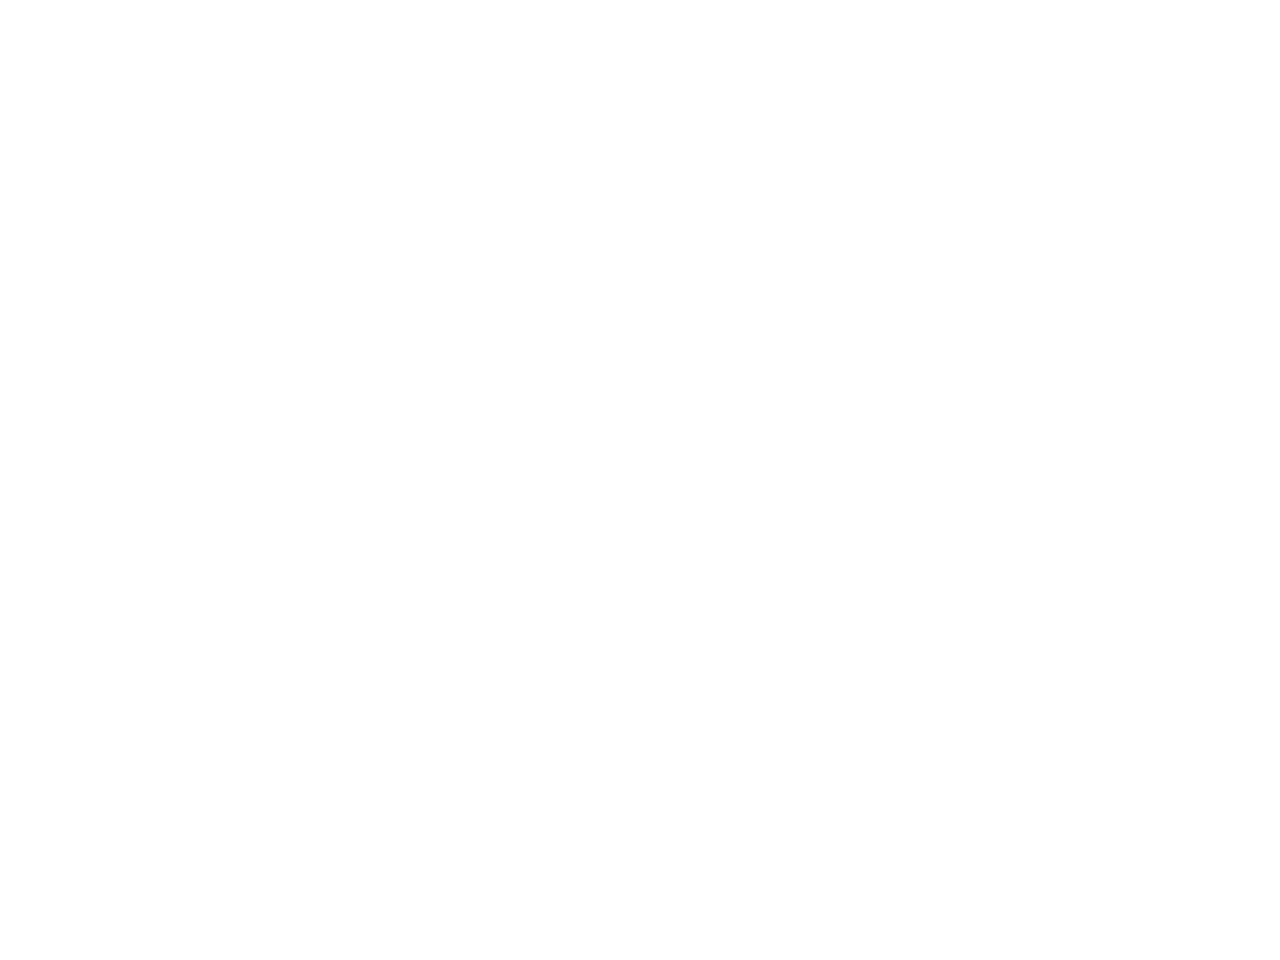

In [7]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

# df_part = df.loc[df['sub'] == subs[i],['f_t_rc','f_t_undo',
#                  'm_t_everyact_rc','m_t_everyc_undo',
#                  't_s_rc','t_s_undo']]

# undobox = []
# for x in t_everyundo[48*i:48*(i+1)]:
#     try: 
#         undobox.append(median(x))
#     except:  pass

# axs[i].plot([1,2],[f_t_rc[48*i:48*(i+1)], f_t_undo[48*i:48*(i+1)]],c = '#6a6763',linewidth=0.3) 
# axs[i].plot([2.5,3.5],[[median(x) for x in t_everyact_rc[48*i:48*(i+1)]], [median(x) for x in t_everyc_undo[48*i:48*(i+1)]]],c = '#6a6763',linewidth=0.3) 
# axs[i].plot([4,5],[t_s_rc[48*i:48*(i+1)],t_s_undo[48*i:48*(i+1)]],c = '#6a6763',linewidth=0.3) 

# plot with puzzle-level RT
bx = axs.boxplot([puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'],
    puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'],
    puzzleID_order_data[puzzleID_order_data['condition']==0]['RTsubmit'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTsubmit']],
   positions =[1,2,3.5,4.5,6,7],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #
    
# normality test
# Shapiro-Wilk Test
    
# stats = [np.nan]*6
# ps = [np.nan]*6
# for s in range(len(stats)):
#     stats[s],ps[s]  = shapiro([math.log2(x) for x in df_part.iloc[:,s]])
#     print('Statistics=%.3f, p=%.3f' % (stats[s], ps[s]))
#     # interpret
#     alpha = 0.05
#     if ps[s] > alpha:
#         print('Sample looks Gaussian (fail to reject H0)')
#     else:
#         print('Sample does not look Gaussian (reject H0)')   
    
#     from scipy.stats import anderson
#     result = [np.nan]*6
#     for s in range(len(result)):
#         result[s]= anderson([math.log2(x) for x in df_part.iloc[:,s]])
#         print('Statistic: %.3f' % result[s].statistic)
#         p = 0
#         for i in range(len(result[s].critical_values)):
#         	sl, cv = result[s].significance_level[i], result[s].critical_values[i]
#         	if result[s].statistic < result[s].critical_values[i]:
#         		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
#         	else:
#         		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
    
# run paired-sample t test
stat1, p1 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'])
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'])

x1, x2 = 3.5,4.5  
y, h, col = bx['caps'][5]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RTsubmit'],puzzleID_order_data[puzzleID_order_data['condition']==1]['RTsubmit'])

x1, x2 = 6,7 
y, h, col = bx['caps'][11]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)

#--------------------------------------
stat4, p4 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==0]['RT1'], puzzleID_order_data[puzzleID_order_data['condition']==0]['RTlater'])

x1, x2 = 1,3.5  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p4)
#--------------------------------------
stat5, p5 = ttest_rel(puzzleID_order_data[puzzleID_order_data['condition']==1]['RT1'], puzzleID_order_data[puzzleID_order_data['condition']==1]['RTlater'])

x1, x2 = 2,4.5  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 5, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p5)

#--------------------------------------
axs.set_xticks([1,1.5,2, 3.5,4,4.5, 6,6.5,7])
axs.set_xticklabels(labels = ['\nwithout \nundo','first choice','\nwith \nundo','\nwithout \nundo','later choices','\nwith \nundo', '\nwithout \nundo','submit','\nwith \nundo'])#,fontsize=18

axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'action_RT.png', dpi=600, bbox_inches='tight')

## different types of undoing RT

In [8]:
index_singleUndo = data_choice_level.index[(data_choice_level['firstUndo'] == 1)&(data_choice_level['lastUndo'] == 1)]
RT_singleUndo = data_choice_level.loc[index_singleUndo,:]

index_firstUndo = data_choice_level.index[(data_choice_level['firstUndo'] == 1) &(data_choice_level['lastUndo'] != 1)]
RT_firstUndo = data_choice_level.loc[index_firstUndo,:]
index_laterUndo = data_choice_level.index[(data_choice_level['firstUndo'] != 1) & (data_choice_level['undo'] == 1)]
RT_laterUndo = data_choice_level.loc[index_laterUndo,:]

<IPython.core.display.Javascript object>


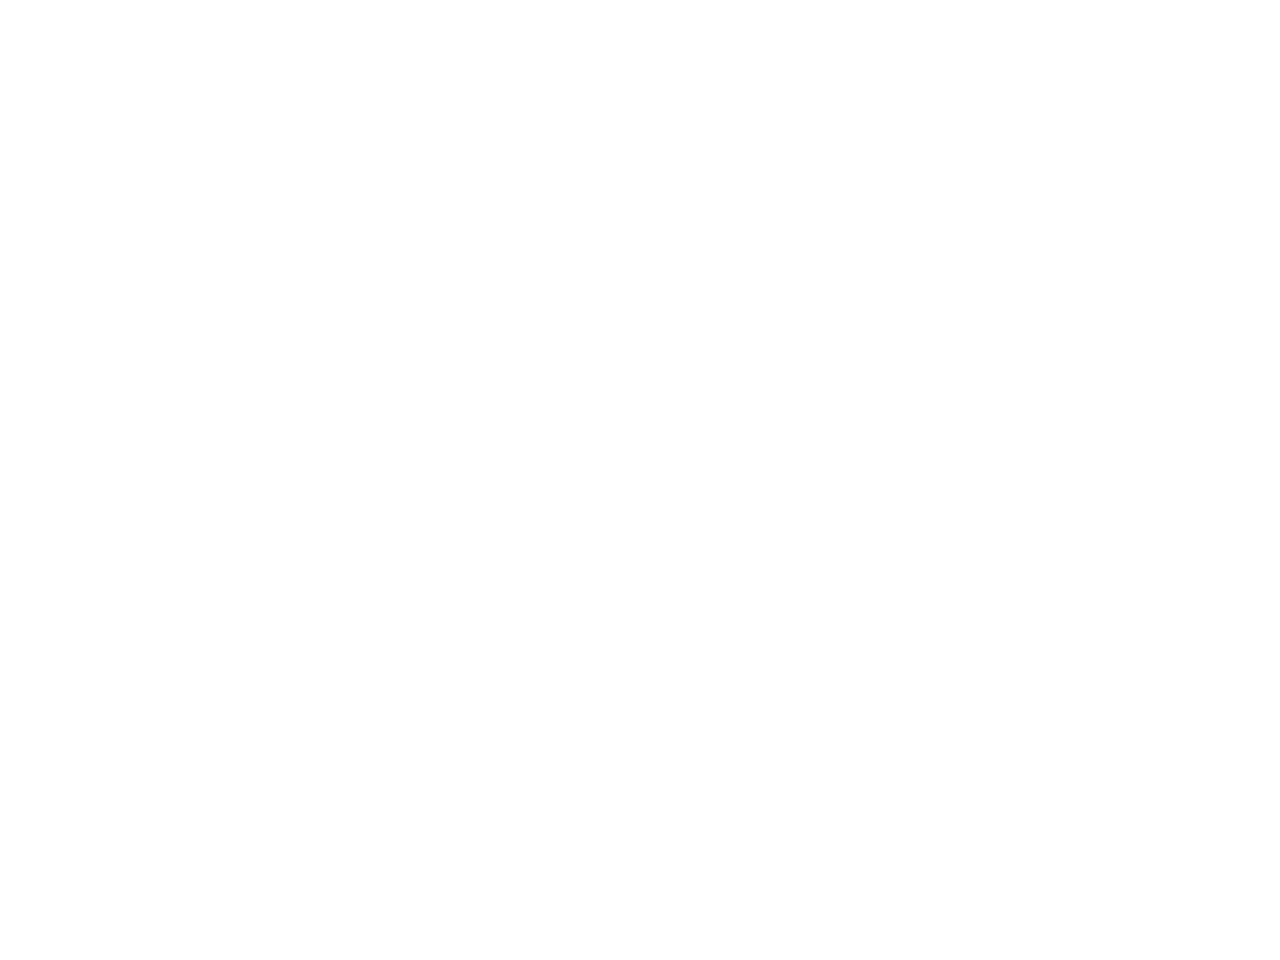

In [9]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.boxplot([RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000],
   positions =[1,2,3],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #

# run 2-independent-sample t test
stat1, p1 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_laterUndo['undoRT']/1000,equal_var=False)
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
stat2, p2 = ttest_ind(RT_laterUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 2,3 
y, h, col = bx['caps'][5]._y[0] + 2, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

#--------------------------------------
stat3, p3 = ttest_ind(RT_firstUndo['undoRT']/1000,RT_singleUndo['undoRT']/1000,equal_var=False)

x1, x2 = 1,3
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 3.5, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 3.5, 0.5, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p3)

#--------------------------------------
axs.set_xticks([1,1.5,2,3])
axs.set_xticklabels(labels = ['\nfirst undo','sequential','\nlater undo','single undo'])#,fontsize=18
axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('Response time (s)') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'undo_RT.png', dpi=600, bbox_inches='tight')

## budget before submit/undo at the end of trial

In [10]:
# only undo condition
index_first_undo =  data_choice_level.index[data_choice_level['firstUndo'] == 1]
df_beforeUndo = data_choice_level.loc[index_first_undo-1,:]
index_end_undo = df_beforeUndo.index[df_beforeUndo['checkEnd'] == 1]
leftover_undo = df_beforeUndo.loc[index_end_undo,'leftover']

index_notundo = data_choice_level.index[(data_choice_level['undo'] == 0)&(data_choice_level['RT'] != -1)]
df_notbeforeUndo = data_choice_level.loc[index_notundo-1,:]
index_end_notundo = df_notbeforeUndo.index[(df_notbeforeUndo['checkEnd'] == 1)&(df_notbeforeUndo['condition'] == 1)]
leftover_notundo = df_notbeforeUndo.loc[index_end_notundo,'leftover']

<IPython.core.display.Javascript object>


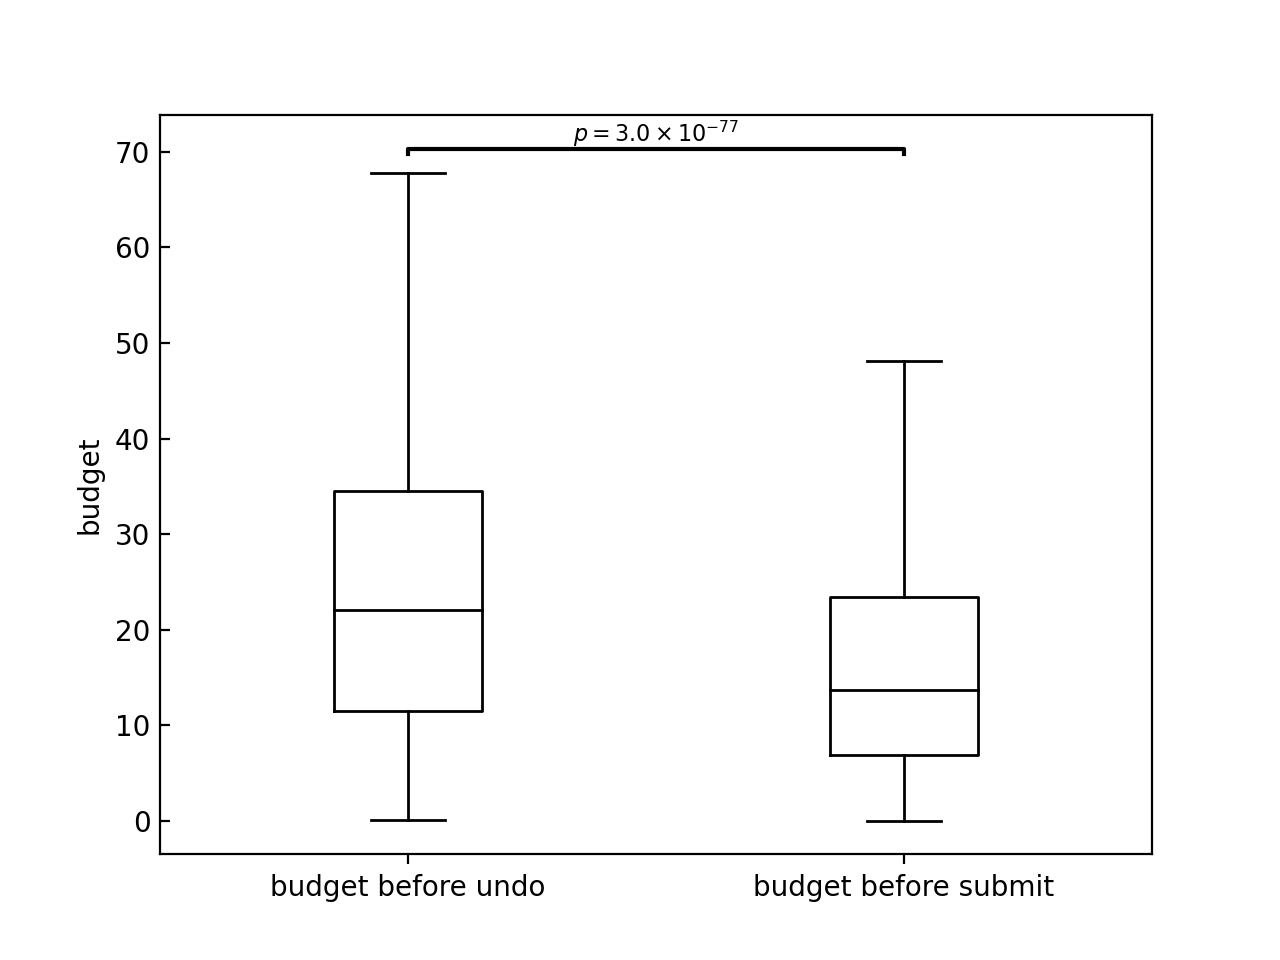

In [11]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)

bx = axs.boxplot([leftover_undo,leftover_notundo],
   positions =[1,2],widths = 0.3,showfliers=False,whis = 1.5,
   medianprops = dict(color = 'k'))  #

# run 2-independent-sample t test
stat1, p1 = ttest_ind(leftover_undo,leftover_notundo,equal_var=False)
x1, x2 = 1,2  
if bx['caps'][1]._y[0] > bx['caps'][3]._y[0]:
    y, h, col = bx['caps'][1]._y[0] + 2, 0.5, 'k'
else:
    y, h, col = bx['caps'][3]._y[0] + 2, 0.5, 'k'

axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

#--------------------------------------
axs.set_xticks([1,2])
axs.set_xticklabels(labels = ['budget before undo','budget before submit'])#,fontsize=18

axs.set_facecolor('white')
axs.spines['bottom'].set_color('k')
axs.spines['left'].set_color('k')
axs.tick_params(axis='y', colors='k', direction='in',left = True) #, labelsize = 16
axs.tick_params(axis='x', colors='k')
# axs.set_title('S'+str(i+1), fontsize = 16)
axs.set_ylabel('budget') #,fontsize=18

# fig.set_figwidth(26)
# fig.set_figheight(12)

plt.show()
fig.savefig(out_dir + 'budget_before_submit_undo.png', dpi=600, bbox_inches='tight')

### counts of errors before undo (by accumulated severity)

In [12]:
index_first_undo =  data_choice_level.index[data_choice_level['firstUndo'] == 1]
df_beforeUndo = data_choice_level.loc[index_first_undo-1,:]

MAS_trial = df_beforeUndo['allMAS']
accu_severity_error = MAS_trial - df_beforeUndo['currMas']
groupby_error = accu_severity_error.value_counts()
print(groupby_error)

1    1270
0     629
2     577
3     170
4      61
5       4
6       1
dtype: int64


In [13]:
# %matplotlib notebook

# fig, axs = plt.subplots(1, 1)

## benefit of undo - number of full undoing

In [14]:
benefit_undo = (np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities']) 
        - np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities']))

undo_count = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numFullUndo'])

yerr = stats.binned_statistic(undo_count, benefit_undo, statistic=lambda y: np.std(y)/np.sqrt(len(y)), bins=[0,1,2,3,4,100])
bins = stats.binned_statistic(undo_count, benefit_undo, 'mean', bins=[0,1,2,3,4,100])

<IPython.core.display.Javascript object>


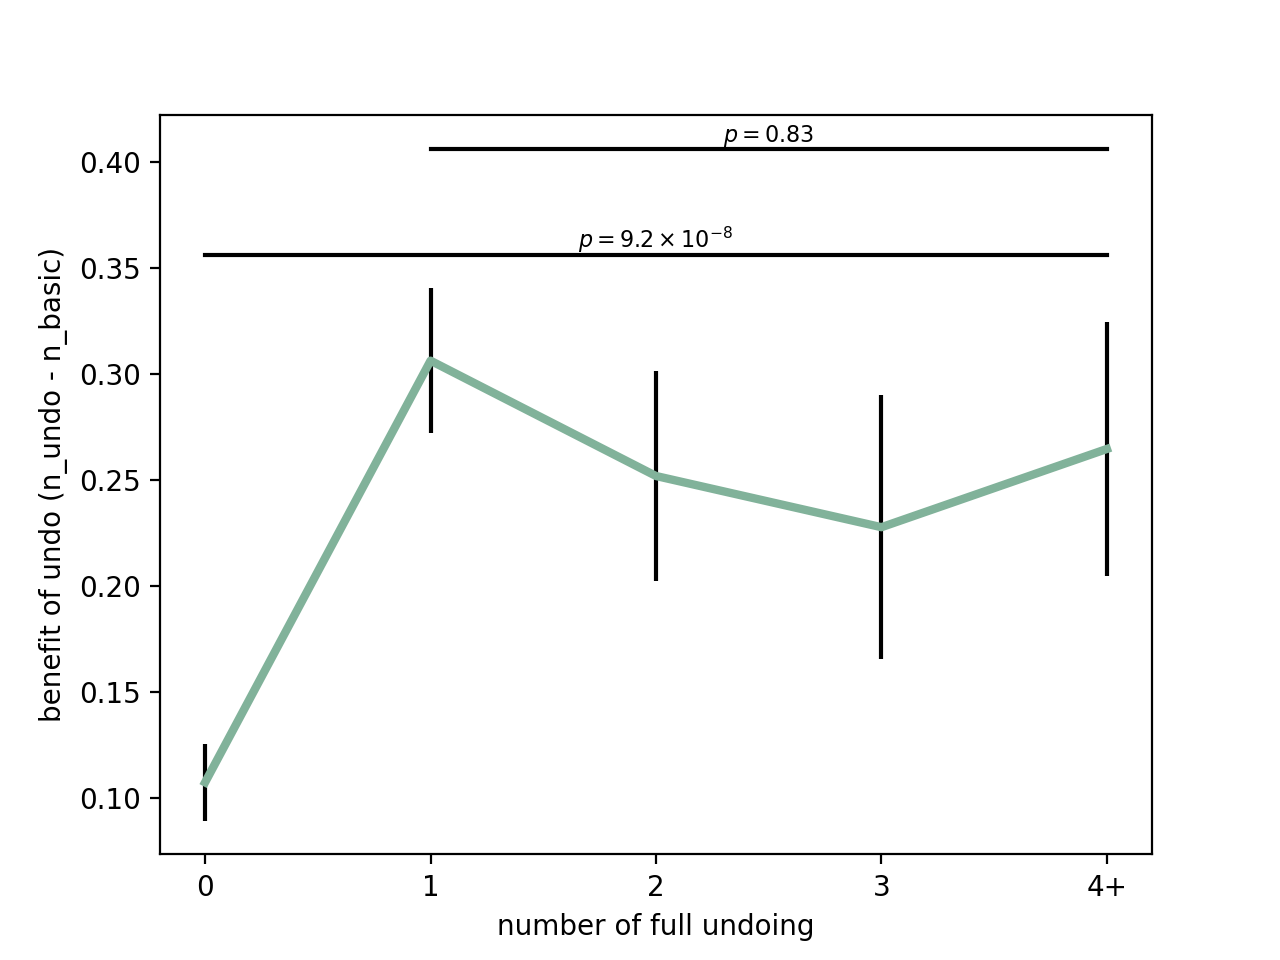

In [15]:
fig, axs = plt.subplots()         
axs.plot(bins[1][:-1], bins[0], color = '#81b29a', linewidth=3)
plotline1, caplines1, barlinecols1 = axs.errorbar(bins[1][:-1], bins[0], yerr[0], capsize = 0, ls='None', color='k')

# non-parametric version of anova (because number of observations is different: https://www.reneshbedre.com/blog/anova.html)
# Kruskal-Wallis Test
stat1, p1 = stats.kruskal(benefit_undo[undo_count==1], benefit_undo[undo_count==2], benefit_undo[undo_count==3],benefit_undo[undo_count>=4])
x1, x2 = 1,4  
y, h, col = bins[0][1] + 0.1, 0, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

stat2, p2 = stats.kruskal(benefit_undo[undo_count==0], benefit_undo[undo_count==1], benefit_undo[undo_count==2], benefit_undo[undo_count==3],benefit_undo[undo_count>=4])
x1, x2 = 0,4  
y, h, col = bins[0][1] + 0.05, 0, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p2)

axs.set_xticks([0,1,2,3,4])
axs.set_xticklabels([0,1,2,3,'4+'])
axs.set_xlabel('number of full undoing')
axs.set_ylabel('benefit of undo (n_undo - n_basic)')
fig.savefig(out_dir + 'undobenefit_undonum.png', dpi=600, bbox_inches='tight')

In [10]:
basic_score = puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'].reset_index(drop=True)
single_condition_data['undo_benefit'] = single_condition_data['numCities'] - basic_score
undo_benefit_sub = single_condition_data.groupby(['subjects'])['undo_benefit'].mean()
undo_count_sub = single_condition_data.groupby(['subjects'])['numFullUndo'].mean()

<IPython.core.display.Javascript object>


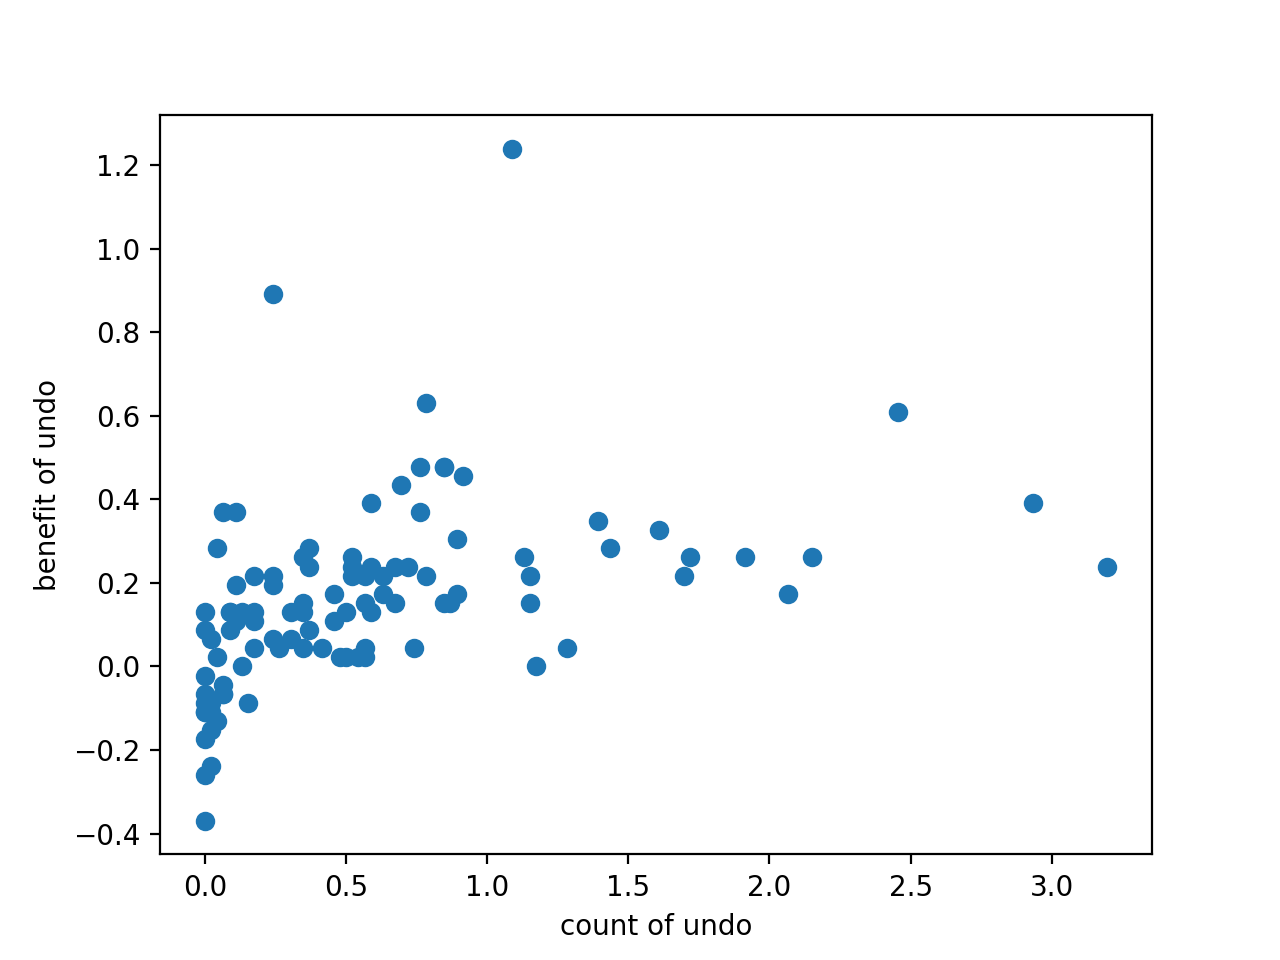

Text(0, 0.5, 'benefit of undo')

In [17]:
#TODO: with a caption stating that each point is a subject, the Spearman rho, and the p-value
fig1, ax1 = plt.subplots()
ax1.plot(undo_count_sub,undo_benefit_sub,'o')
ax1.set_xlabel("average number of undo")
ax1.set_ylabel("benefit of undo")

<IPython.core.display.Javascript object>


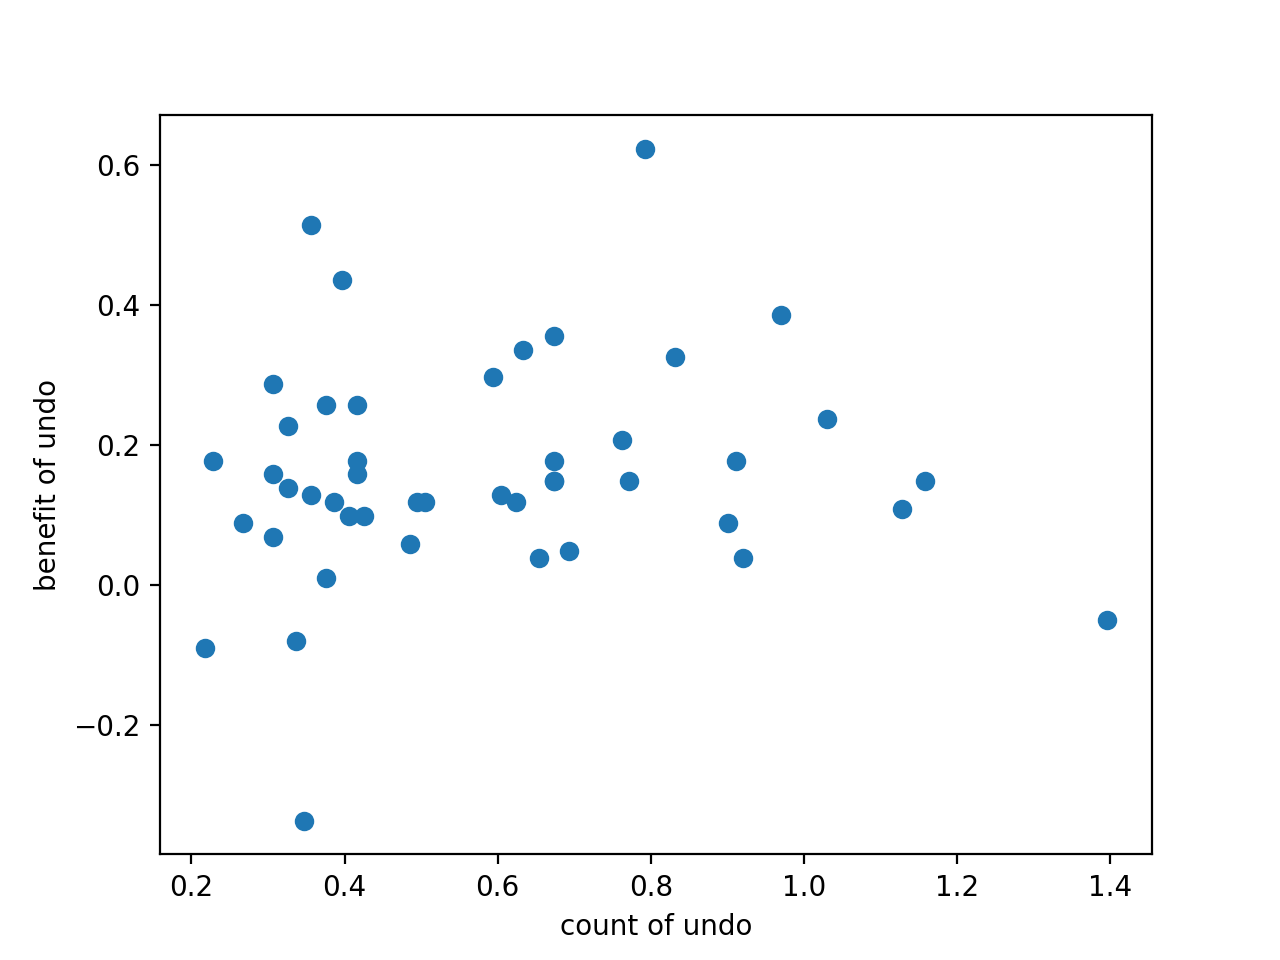

Text(0, 0.5, 'benefit of undo')

In [18]:
undo_benefit_puzzle = single_condition_data.groupby(['puzzleID'])['undo_benefit'].mean()
undo_count_puzzle = single_condition_data.groupby(['puzzleID'])['numFullUndo'].mean()
fig1, ax1 = plt.subplots()
ax1.plot(undo_count_puzzle,undo_benefit_puzzle,'o')
ax1.set_xlabel("average number of undo")
ax1.set_ylabel("benefit of undo")

In [14]:
%%R -i single_condition_data

single_condition_data$subjects <- factor(single_condition_data$subjects)
single_condition_data$puzzleID <- factor(single_condition_data$puzzleID)
# single_condition_data$numFullUndo[single_condition_data$numFullUndo >4] <- 4
# single_condition_data$numFullUndo <- factor(single_condition_data$numFullUndo)

str(single_condition_data)

'data.frame':	4646 obs. of  20 variables:
 $ index            : int  14 17 90 87 77 85 13 70 78 5 ...
 $ subjects         : Factor w/ 101 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ puzzleID         : Factor w/ 46 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ reward           : int  81 49 100 81 81 81 100 81 81 100 ...
 $ numCities        : int  9 7 10 9 9 9 10 9 9 10 ...
 $ mas              : int  9 7 10 10 10 9 10 9 9 10 ...
 $ nos              : int  104 6 70 34 4 5 180 3 10 2 ...
 $ leftover         : num  12.88 20.82 24.61 4.92 3.42 ...
 $ numError         : int  1 3 0 1 1 0 0 0 0 0 ...
 $ sumSeverityErrors: int  1 3 0 1 1 0 0 0 0 0 ...
 $ condition        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ numUNDO          : int  6 11 7 0 0 0 0 0 0 0 ...
 $ numFullUndo      : int  1 3 1 0 0 0 0 0 0 0 ...
 $ numEnd           : int  2 4 2 1 1 1 1 1 1 1 ...
 $ TT               : num  48.6 62.3 56.5 20.5 17.3 ...
 $ RT1              : num  6.99 12.95 5.71 6.92 3.96 ...
 $ RTlater   

In [15]:
%%R

model = lmer(undo_benefit ~ numFullUndo + (numFullUndo|subjects) + (numFullUndo|puzzleID),
                                  data=single_condition_data , control=lmerControl(optimizer="optimx",
                                                                   optCtrl=list(method="nlminb")))

# get the coefficients for the best fitting model
summary(model)

R[write to console]: boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
undo_benefit ~ numFullUndo + (numFullUndo | subjects) + (numFullUndo |  
    puzzleID)
   Data: single_condition_data
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "nlminb"))

REML criterion at convergence: 13143.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1283 -0.2520 -0.1234  0.7032  5.9114 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr
 subjects (Intercept) 0.000e+00 0.000000     
          numFullUndo 3.452e-03 0.058756  NaN
 puzzleID (Intercept) 1.508e-02 0.122797     
          numFullUndo 2.492e-05 0.004992 1.00
 Residual             9.751e-01 0.987446     
Number of obs: 4646, groups:  subjects, 101; puzzleID, 46

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.13680    0.02435 47.08617   5.617 1.01e-06 ***
numFullUndo  0.04548    0.01598  4.61217   2.847   0.0395 *  
---
Signif. c

 135 1232 
 136 1233 


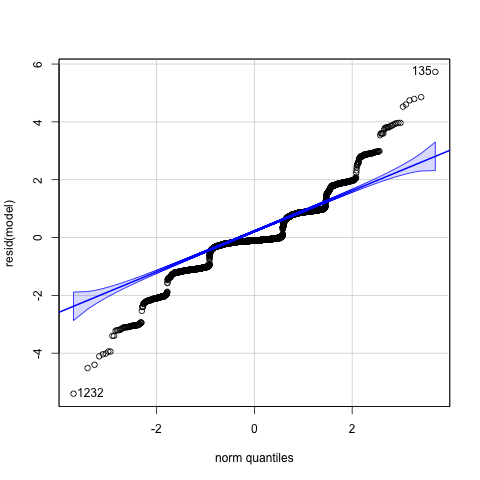

In [13]:
%%R
anova(model)
plot(model)

ranef(model)
## QQ-plots:
# par(mfrow = c(1, 2))
# qqnorm(ranef(model)$subjects[, 1], main = "Random effects of subjects")
# qqnorm(resid(model), main = "Residuals")

qqPlot(resid(model), distribution = "norm")

## count of error - number of optimal solutions

<IPython.core.display.Javascript object>


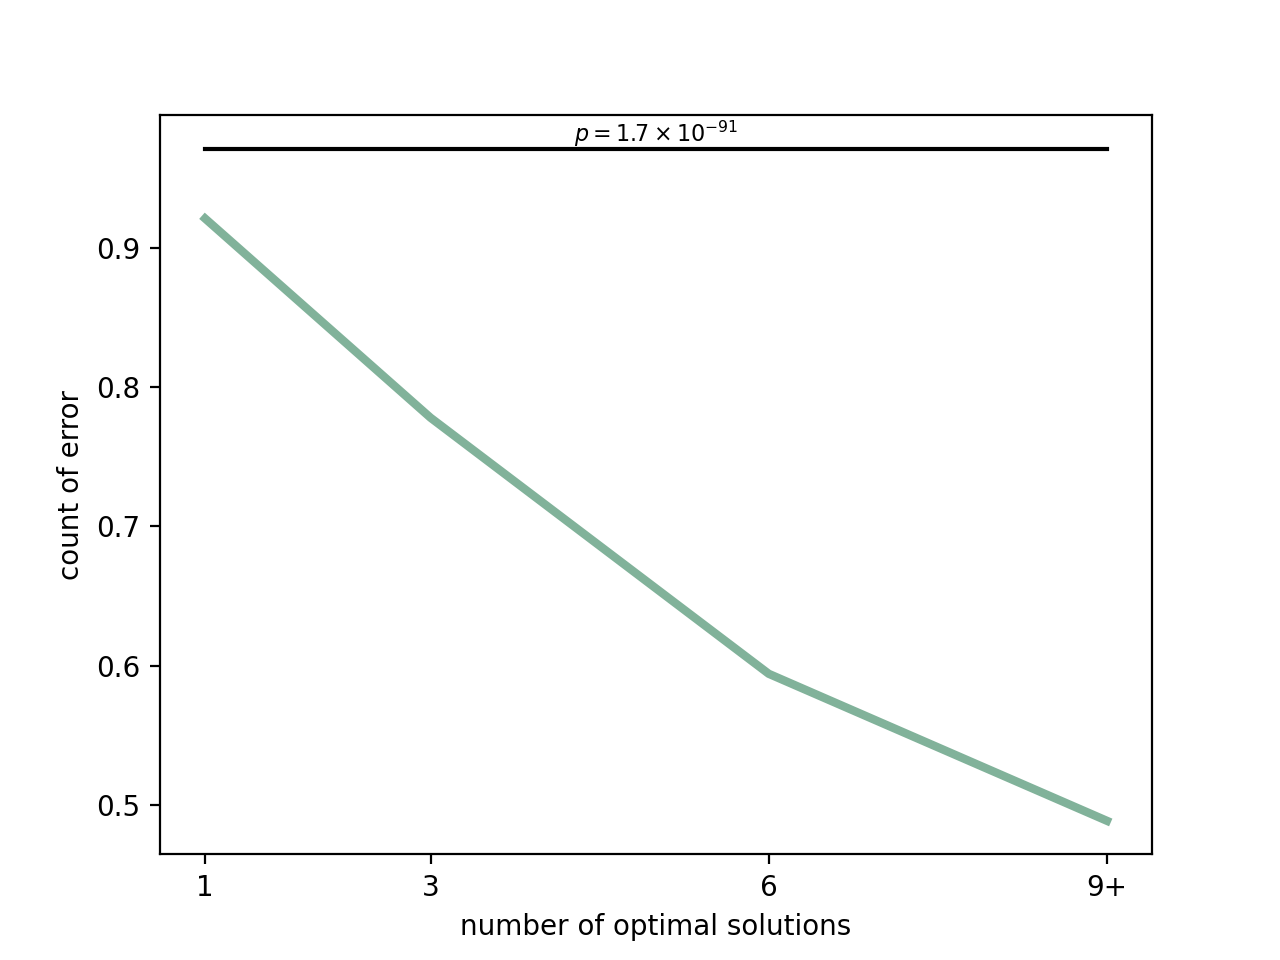

In [19]:
error_basic = np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numError']) 
# error_undo = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numError']) 

n_optimal = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['nos'])

bins1 = stats.binned_statistic(n_optimal, error_basic, 'mean', bins=[1,3,6,9,100])
# bins2 = stats.binned_statistic(n_optimal, error_undo, 'mean', bins=[1,3,6,9,15])

fig, axs = plt.subplots()         
axs.plot(bins1[1][:-1], bins1[0], color = '#81b29a', linewidth=3,label='basic')
# axs.plot(bins2[1][:-1], bins2[0],linewidth=3,label='undo')

# non-parametric version of anova (because number of observations is different: https://www.reneshbedre.com/blog/anova.html)
# Kruskal-Wallis Test
stat1, p1 = stats.kruskal(error_basic[(n_optimal<3) & (n_optimal>=1)], error_basic[(n_optimal<6) & (n_optimal>=3)], error_basic[(n_optimal<9) & (n_optimal>=6)],error_basic[n_optimal>=9])
x1, x2 = 1,9
y, h, col = bins1[0][0] + 0.05, 0, 'k'
axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
text(p1)

axs.set_xlabel('number of optimal solutions')
axs.set_ylabel('count of error')
axs.set_xticks([1,3,6,9])
axs.set_xticklabels([1,3,6,'9+'])
# axs.legend()
fig.savefig(out_dir + 'error_optimal.png', dpi=600, bbox_inches='tight')
